In [1]:
%matplotlib inline
import warnings; warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open ("saprc99_code/saprc99_Parameters.f90", "r") as f:
    code_str = f.readlines()

In [3]:
varnames = []

pattern = 'INTEGER, PARAMETER :: ind_'
for line in code_str:
    if pattern in line:
        varnames.append( line.replace(pattern,'').split()[0] )

print(len(varnames), varnames)

79 ['H2SO4', 'HCOOH', 'CCO_OH', 'RCO_OH', 'CCO_OOH', 'RCO_OOH', 'XN', 'XC', 'SO2', 'O1D', 'ALK1', 'BACL', 'PAN', 'PAN2', 'PBZN', 'MA_PAN', 'H2O2', 'N2O5', 'HONO', 'ALK2', 'ALK3', 'TBU_O', 'ALK5', 'ARO2', 'HNO4', 'COOH', 'HOCOO', 'BZNO2_O', 'MEOH', 'ALK4', 'ARO1', 'DCB2', 'DCB3', 'CRES', 'DCB1', 'NPHE', 'ROOH', 'BALD', 'PHEN', 'CO', 'MGLY', 'ACET', 'HNO3', 'ETHENE', 'GLY', 'BZ_O', 'ISOPRENE', 'R2O2', 'TERP', 'METHACRO', 'OLE1', 'ISOPROD', 'OLE2', 'MVK', 'CCHO', 'HCHO', 'RNO3', 'O3P', 'RCHO', 'MEK', 'PROD2', 'O3', 'HO2', 'RO2_N', 'MA_RCO3', 'C_O2', 'BZCO_O2', 'RO2_R', 'NO', 'NO2', 'NO3', 'CCO_O2', 'RCO_O2', 'OH', 'AIR', 'O2', 'H2O', 'H2', 'CH4']


In [4]:
df = pd.read_csv('saprc99_code/saprc99.dat',
                 delim_whitespace=True, header=None, index_col=0)
df.columns = varnames
df.index.name = 'time'

# saprc also print invalid format, like small_strato
df = df.apply(pd.to_numeric, errors='coerce')
df[np.isnan(df)] = 0.0
df.shape

(241, 79)

In [5]:
df.head()

,H2SO4,HCOOH,CCO_OH,RCO_OH,CCO_OOH,RCO_OOH,XN,XC,SO2,O1D,...,NO2,NO3,CCO_O2,RCO_O2,OH,AIR,O2,H2O,H2,CH4
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.000000,0.000677,0.001160,0.000392,0.000000e+00,0.000000e+00,0.000000,0.200000,0.050000,0.000000e+00,...,0.050000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1000000.0,209000.0,20000.0,0.0,1.0
1.0,0.000534,0.000816,0.001272,0.000620,5.977174e-09,2.556933e-09,0.000001,0.200344,0.049466,2.366213e-15,...,0.075428,4.514130e-08,2.256421e-08,8.075756e-09,1.395566e-07,1000000.0,209000.0,20000.0,0.0,1.0
2.0,0.001149,0.000995,0.001380,0.000841,3.925920e-08,1.715316e-08,0.000029,0.201040,0.048851,5.292326e-15,...,0.092764,2.304053e-07,5.336449e-08,2.117466e-08,1.545205e-07,1000000.0,209000.0,20000.0,0.0,1.0
3.0,0.001829,0.001183,0.001439,0.000964,1.750861e-07,7.824948e-08,0.000248,0.202336,0.048171,8.869341e-15,...,0.092115,7.448597e-07,1.088316e-07,4.572461e-08,1.750943e-07,1000000.0,209000.0,20000.0,0.0,1.0
4.0,0.002577,0.001373,0.001461,0.001014,6.672023e-07,3.021821e-07,0.001126,0.205499,0.047423,1.134640e-14,...,0.081574,1.849736e-06,2.065510e-07,8.913792e-08,1.893894e-07,1000000.0,209000.0,20000.0,0.0,1.0


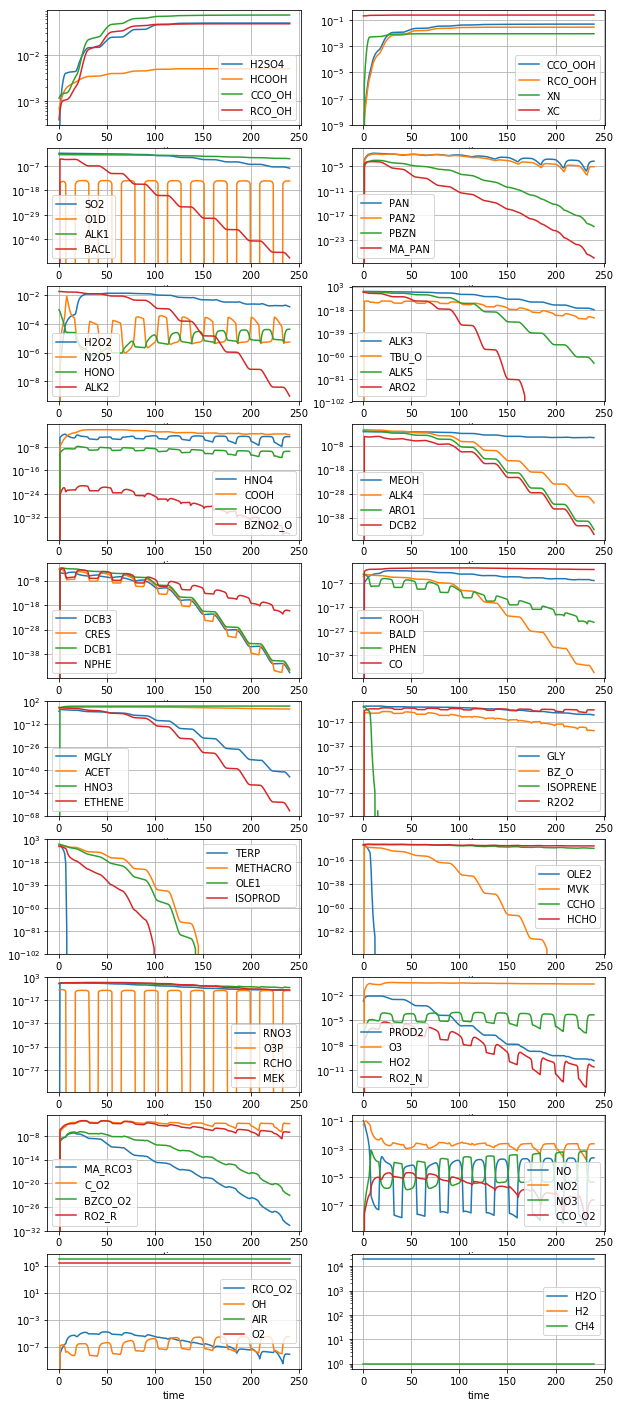

In [6]:
N_sub = 4
N_figures = 20

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 25])

for i in range(N_figures):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df.plot(y=sub_name, logy=True, grid=True, ax=axes.ravel()[i])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
StandardScaler(copy=False).fit_transform(df.values);

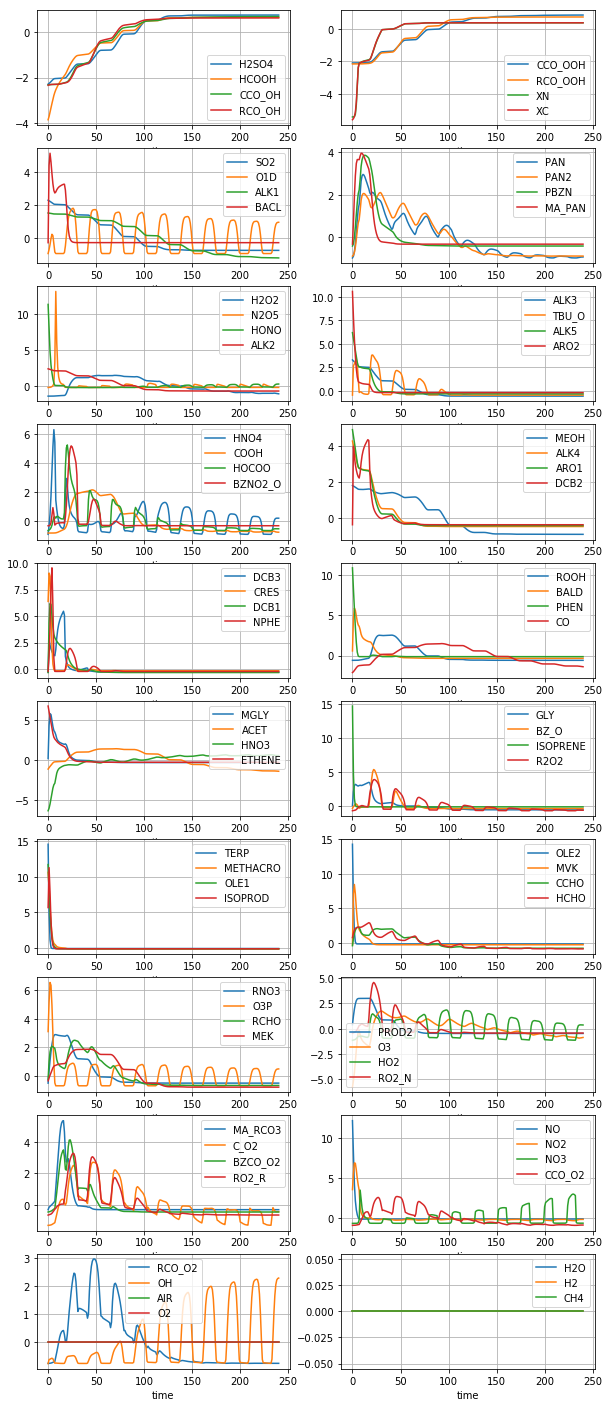

In [9]:
N_sub = 4
N_figures = 20

fig, axes = plt.subplots(N_figures//2, 2, figsize=[10, 25])

for i in range(N_figures):
    sub_name = varnames[i*N_sub:(i+1)*N_sub]
    df.plot(y=sub_name, grid=True, ax=axes.ravel()[i])